<a href="https://colab.research.google.com/github/kurtlee1984/Deep_Leaning/blob/main/Cifar10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [54]:
from tensorflow.keras.datasets.cifar10 import load_data
(x_train, y_train), (x_test, y_test) = load_data()

In [55]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(50000, 32, 32, 3)
(50000, 1)
(10000, 32, 32, 3)
(10000, 1)


In [56]:
names = [
    "airplane",									
    "automobile", 										
    "bird", 										
    "cat", 										
    "deer", 										
    "dog", 										
    "frog", 										
    "horse", 										
    "ship", 										
    "truck"
]

horse


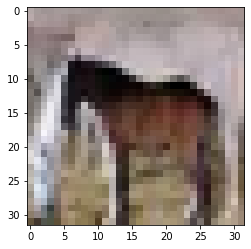

In [57]:
import matplotlib.pyplot as plt
import random
idx = random.randint(0, 49999)
ans = y_train[idx][0]
print(names[ans])
plt.imshow(x_train[idx])

In [58]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.layers import Dense, Flatten, Dropout
layers = [
    # 3 * 3 * 3(一個) * 64 + 64(bias) = 1792
    Conv2D(64, 3, activation="relu", padding="same", input_shape=(32, 32, 3)),
    Conv2D(64, 3, activation="relu", padding="same"),
    MaxPooling2D(),
    # 3 * 3 * 64(一個) * 128 + 128(bias) = 73856
    Conv2D(128, 3, activation="relu", padding="same"),
    Conv2D(128, 3, activation="relu", padding="same"),
    MaxPooling2D(),
    Conv2D(256, 3, activation="relu", padding="same"),
    Conv2D(256, 3, activation="relu", padding="same"),
    MaxPooling2D(),
    Flatten(),
    Dense(128, activation="relu"),
    # 128 * 10 + 10(bias) = 1290
    Dropout(0.25),
    Dense(64, activation="relu"),
    Dropout(0.25),
    Dense(10, activation="softmax")
]
model = Sequential(layers)
model.summary() 

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_38 (Conv2D)           (None, 32, 32, 64)        1792      
_________________________________________________________________
conv2d_39 (Conv2D)           (None, 32, 32, 64)        36928     
_________________________________________________________________
max_pooling2d_19 (MaxPooling (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_40 (Conv2D)           (None, 16, 16, 128)       73856     
_________________________________________________________________
conv2d_41 (Conv2D)           (None, 16, 16, 128)       147584    
_________________________________________________________________
max_pooling2d_20 (MaxPooling (None, 8, 8, 128)         0         
_________________________________________________________________
conv2d_42 (Conv2D)           (None, 8, 8, 256)        

In [59]:
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.optimizers import Adam
model.compile(
    loss=SparseCategoricalCrossentropy(),
    optimizer=Adam(),
    metrics=["accuracy"]
)

In [60]:
x_train_norm = x_train / 255.0
x_test_norm = x_test / 255.0

In [61]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
callbacks = [
    EarlyStopping(patience=5, restore_best_weights=True),
    ModelCheckpoint("cnn.h5", save_best_only=True)
]
model.fit(x_train_norm,
          y_train,
          validation_split=0.1,
          epochs=100,
          batch_size=200,
          verbose=2,
          callbacks=callbacks)

Epoch 1/100
225/225 - 9s - loss: 1.8198 - accuracy: 0.3135 - val_loss: 1.5253 - val_accuracy: 0.4460
Epoch 2/100
225/225 - 8s - loss: 1.3682 - accuracy: 0.5016 - val_loss: 1.1742 - val_accuracy: 0.5768
Epoch 3/100
225/225 - 8s - loss: 1.1225 - accuracy: 0.6045 - val_loss: 0.9032 - val_accuracy: 0.6788
Epoch 4/100
225/225 - 8s - loss: 0.9424 - accuracy: 0.6728 - val_loss: 0.7933 - val_accuracy: 0.7236
Epoch 5/100
225/225 - 8s - loss: 0.8193 - accuracy: 0.7158 - val_loss: 0.7399 - val_accuracy: 0.7396
Epoch 6/100
225/225 - 8s - loss: 0.7042 - accuracy: 0.7590 - val_loss: 0.7014 - val_accuracy: 0.7560
Epoch 7/100
225/225 - 8s - loss: 0.6207 - accuracy: 0.7894 - val_loss: 0.6300 - val_accuracy: 0.7906
Epoch 8/100
225/225 - 8s - loss: 0.5446 - accuracy: 0.8144 - val_loss: 0.6652 - val_accuracy: 0.7774
Epoch 9/100
225/225 - 8s - loss: 0.4715 - accuracy: 0.8409 - val_loss: 0.6185 - val_accuracy: 0.7926
Epoch 10/100
225/225 - 8s - loss: 0.4068 - accuracy: 0.8610 - val_loss: 0.6154 - val_accura

In [62]:
model.evaluate(x_test_norm, y_test)

313/313 [==============================] - 1s 4ms/step - loss: 0.6506 - accuracy: 0.7973


[0.6505972146987915, 0.7972999811172485]

In [65]:
import pandas as pd
from sklearn.metrics import confusion_matrix
y_test_r = y_test.reshape(-1)
pre = model.predict_classes(x_test_norm)
mat = confusion_matrix(y_test_r, pre)
pd.DataFrame(mat, 
             columns=["{}(預測)".format(names[i]) for i in range(10)],
             index=["{}(正確)".format(names[i]) for i in range(10)])

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


,airplane(預測),automobile(預測),bird(預測),cat(預測),deer(預測),dog(預測),frog(預測),horse(預測),ship(預測),truck(預測)
airplane(正確),855,10,28,9,6,2,2,9,36,43
automobile(正確),4,920,1,4,0,2,1,0,8,60
bird(正確),74,8,706,57,60,30,20,30,7,8
cat(正確),19,4,60,653,45,131,22,43,9,14
deer(正確),16,1,51,48,746,20,23,87,5,3
dog(正確),6,5,31,151,30,687,3,76,4,7
frog(正確),8,6,58,72,37,20,772,10,9,8
horse(正確),9,2,18,25,33,27,1,869,1,15
ship(正確),67,20,4,14,5,1,2,4,859,24
truck(正確),10,55,4,9,2,1,0,4,9,906


In [67]:
print(y_test.shape)
print(pre.shape)
# -1: 叫他幫你算 10000 * 1 = -1(?)
print(y_test_r.shape)

(10000, 1)
(10000,)
(10000,)


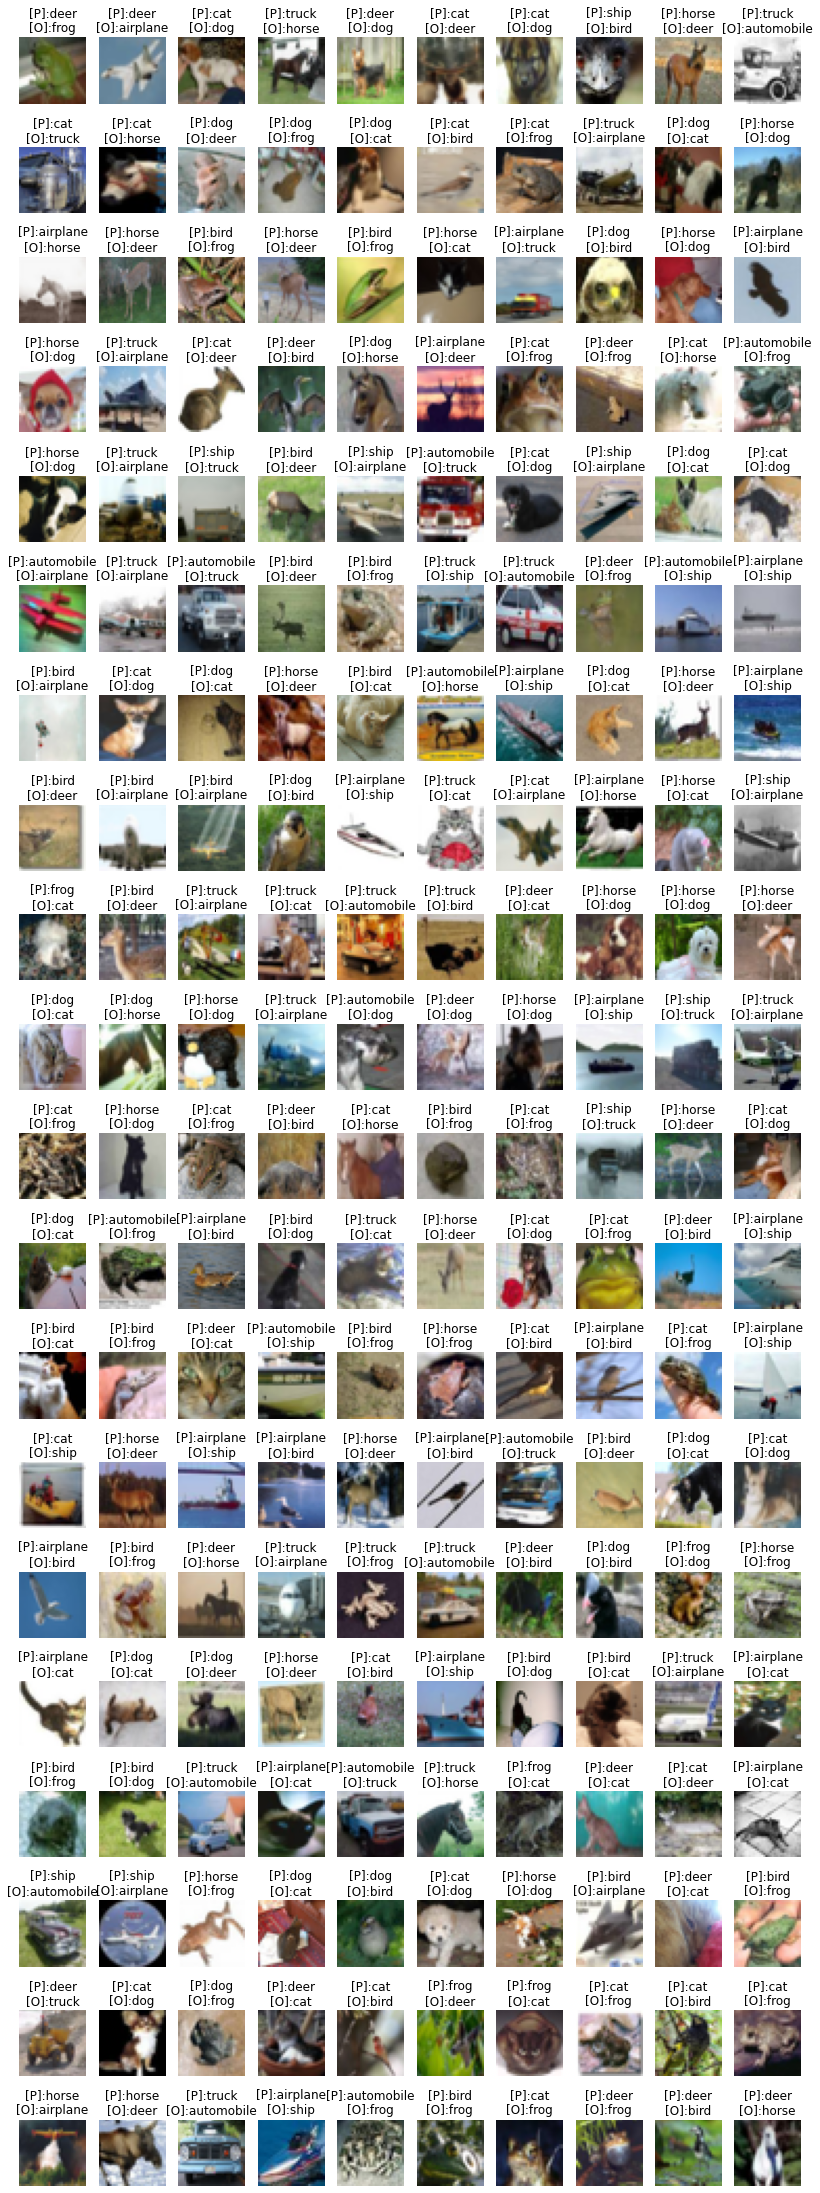

In [68]:
import numpy as np
idx = np.nonzero(pre != y_test_r)[0]
idx = idx[:200]
# np.nonzero([[0, 2, 0], [0, 0, 3]])
false_pre = pre[idx]
false_label = y_test_r[idx] 
false_img = x_test[idx]

plt.figure(figsize=(14, 42))
width = 10
height = len(idx) // width + 1
for i in range(len(false_img)):
    plt.subplot(height, width, i+1)
    title = "[P]:{}\n[O]:{}".format(names[false_pre[i]], names[false_label[i]])
    plt.title(title)
    plt.axis("off")
    plt.imshow(false_img[i])